In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters as filters
import pm

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()


C:\Users\ogsimp\AppData\Local\Temp\ipykernel_18608\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


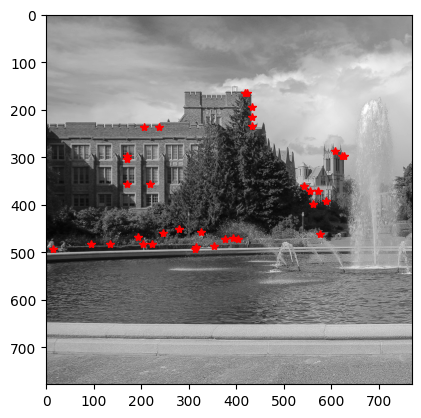

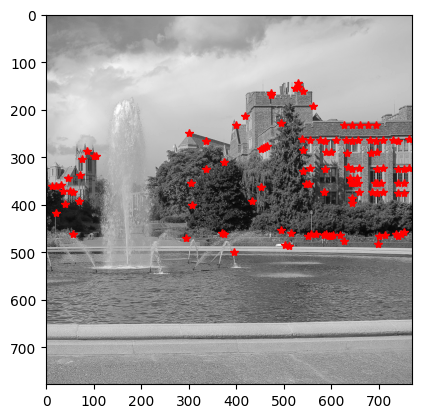

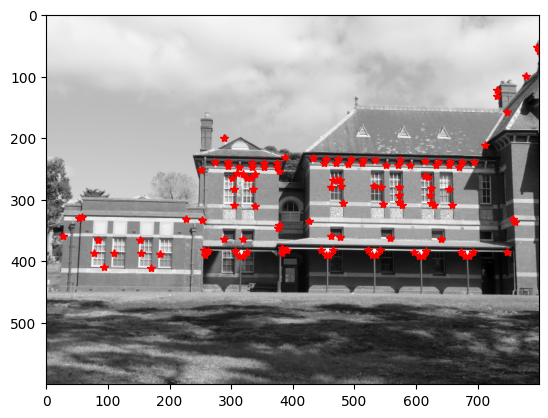

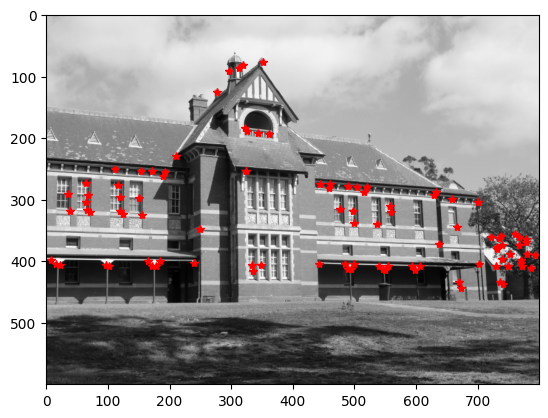

In [39]:
def harris(image, n=3, k=0.05):
    sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, n)
    sobel_y = cv2.Sobel(image, cv2.CV_32F, 0 , 1, n)

    ixx = sobel_x * sobel_x
    ixy = sobel_x * sobel_y
    iyy = sobel_y * sobel_y

    ixx_gaus = cv2.GaussianBlur(ixx, (n,n), 1)
    ixy_gaus = cv2.GaussianBlur(ixy, (n,n), 1)
    iyy_gaus = cv2.GaussianBlur(iyy, (n,n), 1)

    trace = ixx_gaus + ixy_gaus
    det = ixx_gaus*iyy_gaus - ixy_gaus**2
    H = det - k*trace**2

    return (H - np.min(H)) / (np.max(H) - np.min(H))

def find_max(image, size, threshold): #size - maximum filter mask size
    data_max = filters.maximum_filter(image, size)
    maxima = (image == data_max)
    diff = image > threshold
    maxima[diff == 0] = 0
    return np.nonzero(maxima)

def plot_maxes(image, maxes):
    plt.imshow(image, cmap="gray")
    plt.plot(maxes[1], maxes[0], "*", color="red")
    plt.show()


image_1 = cv2.imread("fontanna1.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("fontanna2.jpg", cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread("budynek1.jpg", cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread("budynek2.jpg", cv2.IMREAD_GRAYSCALE)

for image in [image_1, image_2, image_3, image_4]:
    h = harris(image)
    maxes = find_max(h, 7, 0.5)
    plot_maxes(image, maxes)

C:\Users\ogsimp\AppData\Local\Temp\ipykernel_18608\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


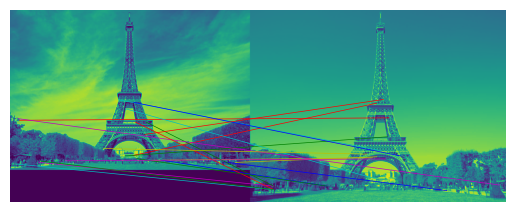

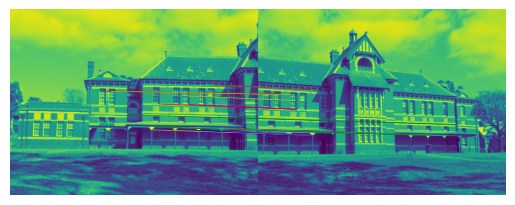

In [40]:
def descrption(image, points, size=3):
    Y, X = image.shape
    points = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size and pt[1]>= size and pt[1] < X - size, zip(points[0], points[1])))
    descriptions = []

    for point in points:
        point_description = image[point[0] - size: point[0] + size + 1, point[1] - size: point[1] + size + 1]
        descriptions.append(point_description.flatten())

    return list(zip(points, descriptions))

def description_updated(image, points, size=3):
    Y, X = image.shape
    points = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size and pt[1]>= size and pt[1] < X - size, zip(points[0], points[1])))
    descriptions = []

    for point in points:
        point_description = image[point[0] - size: point[0] + size + 1, point[1] - size: point[1] + size + 1]
        point_description = point_description.flatten()

        mean = np.mean(point_description)
        std = np.std(point_description)
        descriptions.append((point_description - mean) / std)

    return list(zip(points, descriptions))


def compare_descriptions(point_descs_1, point_descs_2, n=20):
    res = []

    for point_1, desc_1 in point_descs_1:
        min_dist = float("inf")
        best_one = None
        for point_2, desc_2 in point_descs_2:
            dist = sum(abs(desc_1 - desc_2))

            if dist < min_dist:
                min_dist = dist
                best_one = [point_1, point_2, dist]

        res.append(best_one)

    res.sort(key=lambda x: x[2])
    return res[:n]


def do_all(image_name_1, image_name_2):
    image_1 = cv2.imread(image_name_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_name_2, cv2.IMREAD_GRAYSCALE)

    h_1 = harris(image_1)
    h_2 = harris(image_2)

    maxes_1 = find_max(h_1, 7, 0.5)
    maxes_2 = find_max(h_2, 7, 0.5)

    descrption_1 = descrption(image_1, maxes_1)
    descrption_2 = descrption(image_2, maxes_2)

    closest_points = compare_descriptions(descrption_1, descrption_2)

    pm.plot_matches(image_1, image_2, closest_points)

do_all("eiffel1.jpg", "eiffel2.jpg")
do_all("budynek1.jpg", "budynek2.jpg")

C:\Users\ogsimp\AppData\Local\Temp\ipykernel_18608\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


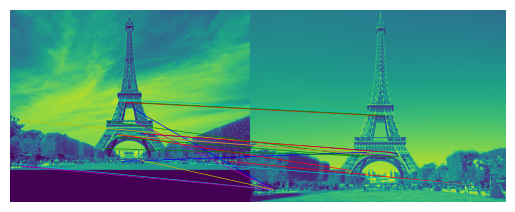

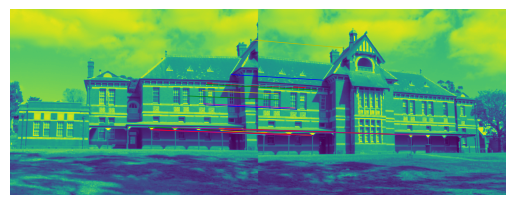

In [41]:
def do_all_2(image_name_1, image_name_2):
    image_1 = cv2.imread(image_name_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_name_2, cv2.IMREAD_GRAYSCALE)

    h_1 = harris(image_1)
    h_2 = harris(image_2)

    maxes_1 = find_max(h_1, 7, 0.5)
    maxes_2 = find_max(h_2, 7, 0.5)

    descrption_1 = description_updated(image_1, maxes_1)
    descrption_2 = description_updated(image_2, maxes_2)

    closest_points = compare_descriptions(descrption_1, descrption_2)

    pm.plot_matches(image_1, image_2, closest_points)

do_all_2("eiffel1.jpg", "eiffel2.jpg")
do_all_2("budynek1.jpg", "budynek2.jpg")

# CZESC 2

In [97]:
def corner_score(circle, center, threshold, n=9):
    lower_count = 0
    higher_count = 0
    for val in circle:
        if val > center + threshold:
            higher_count += 1
            lower_count = 0
            if higher_count >= n:
                return True
        if val < center - threshold:
            lower_count += 1
            higher_count = 0
            if lower_count >= n:
                return True

    return False

In [98]:
def fast(img, harr, threshold, r=3):
    points = []
    harris_values = []
    for y in range(r, img.shape[0] - r):
        for x in range(r, img.shape[1] - r):
            center_intensity = img[y, x]
            
            intensities = [
                img[y - 3, x], img[y - 3, x + 1], img[y - 2, x + 2], img[y - 1, x + 3],
                img[y, x + 3], img[y + 1, x + 3], img[y + 2, x + 2], img[y + 3, x + 1],
                img[y + 3, x], img[y + 3, x - 1], img[y + 2, x - 2], img[y + 1, x - 3],
                img[y, x - 3], img[y - 1, x - 3], img[y - 2, x - 2], img[y - 3, x - 1]
            ]

            if corner_score(intensities, center_intensity, threshold):
                points.append((y, x))
                harris_values.append(harr[y, x])
    return points, harris_values

  
def fast_points(img, threshold=40, N=200):
    harr = harris(img)

    size = 7
    r = size // 2

    points, harr_values = fast(img, harr, threshold, r)

    points_harr = list(zip(points, harr_values))
    points_harr.sort(key=lambda x: x[1], reverse=True)
    points_harr = points_harr[:N]


    output = {key: value for key, value in points_harr}

    return output

def non_max(img, points: dict):
    values_to_remove = []
    for p, h in points.items():
        if (p, h) in values_to_remove:
            continue

        y, x = p
        values = []
        for i in range(y-1, y+2):
            for j in range(x-1, x+2):
                if i<0 or j<0 or i>img.shape[0]-1 or j>img.shape[1]-1:
                    continue
                if (i, j) in points:
                    values.append(((i, j), points[(i, j)]))

        if len(values) > 1:
            values.sort(key=lambda x: x[1])
            for v in values[:-1]:
                if v not in values_to_remove:
                    values_to_remove.append(v)


    for v in values_to_remove:
        points.pop(v[0])
    return points

def filter_points_with_no_surrounding(img, points_clear, size=50):
    Y, X = img.shape
    pts = list(filter(lambda pt: size <= pt[0][0] < Y - size
                                 and size <= pt[0][1] < X - size, list(zip(points_clear.keys(), points_clear.values()))))

    return pts

def intensity_centroid(image, points, r=9):
    res_c = []
    res_angle = []
    for point in points:
        y, x = point[0]

        m00, m01, m10 = 0, 0, 0

        for i in range(y-r, y+r+1):
            for j in range(x-r, x+r+1):
                dy = y - i
                dx = x - j

                if dx*dx + dy*dy <= 3**2:
                    m00 += image[i, j]
                    m01 += dy * image[i, j]
                    m10 += dx * image[i, j]
        c = (m10/m00, m01/m00)
        angle = np.arctan2(m01,m10)
        res_c.append(c)
        res_angle.append(angle)

    return res_c, res_angle

In [99]:
def brief_defined(ctx, theta):
    score = []
    with open('orb_descriptor_positions.txt', 'r') as f:
        for line in f:
            vals = line.split(' ')
            vals = [float(x) for x in vals]

            vals = [x + 15 for x in vals] #rescale form -15, 15 to 0, 30

            ui = vals[:2]
            vi = vals[2:]

            ui[0] = int(np.cos(theta)*ui[0] + np.sin(theta)*ui[1])
            ui[1] = int(np.sin(theta)*ui[1] + np.cos(theta)*ui[0])

            vi[0] = int(np.cos(theta)*vi[0] + np.sin(theta)*vi[1])
            vi[1] = int(np.sin(theta)*vi[1] + np.cos(theta)*vi[0])

            ui = tuple(ui)
            vi = tuple(vi)

            if ctx[ui] < ctx[vi]:
                score.append(1)
            else:
                score.append(0)
    return score

         

def brief(img, pts, theta, size=31):

    scores = []
    pts = [x[0] for x in pts] #remove values (only y, x left)
    for i, p in enumerate(pts):
        y, x = p
        th = theta[i]

        ctx = img[y-size:y+size+1, x-size:x+size+1]
        ctxGaus = cv2.GaussianBlur(ctx, (5, 5), 0)
        brief_score = brief_defined(ctxGaus, th)
        scores.append(brief_score)

    return scores

def orb(img, threshold=40, n=30):
    points = fast_points(img, threshold)
    points_clear = non_max(img, points)
    points_filtered = filter_points_with_no_surrounding(img, points_clear)

    points_filtered.sort(key=lambda x: x[1], reverse=True)
    points_best = points_filtered[:n]
    C, theta = intensity_centroid(img, points_best)
    scores = brief(img, points_best, theta)
    points_best = [p[0] for p in points_best]

    return scores, points_best


In [100]:
def do_orb(img_name_1, img_name_2):
    image_1 = cv2.imread(img_name_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(img_name_2, cv2.IMREAD_GRAYSCALE)

    scores1, pts1 = orb(image_1)
    scores2, pts2 = orb(image_2)

    comparison = compare_scores_orb(scores1, scores2, pts1, pts2)
    pm.plot_matches(image_1, image_2, comparison)

# PYRAMIDA

In [101]:
SCALER = 1.5

def pyramid(img, max_scale):
    images = [img]
    for k in range(1, max_scale):
        images.append(cv2.resize(images[k-1], (0, 0), fx=1/SCALER, fy=1/SCALER))
    return images


def mutli_scale_orb(img1, img2, max_scale=3):
    img1_list = pyramid(img1, max_scale)
    img2_list = pyramid(img2, max_scale)

    pts1_list = []
    pts2_list = []

    scores1_list = []
    scores2_list = []

    img1_orig = img1.copy()
    img2_orig = img2.copy()

    for scale in range(max_scale-1, -1, -1):
        img1 = img1_list[scale]
        img2 = img2_list[scale]

        scores1, pts1 = orb(img1)
        scores2, pts2 = orb(img2)

        pts1_map = np.zeros(img1.shape)
        pts2_map = np.zeros(img2.shape)

        pts1_map[tuple(np.transpose(pts1))] = 1
        pts2_map[tuple(np.transpose(pts2))] = 1

        pts1_map = cv2.resize(pts1_map, (img1_orig.shape[1], img1_orig.shape[0]), interpolation=cv2.INTER_LINEAR)
        pts2_map = cv2.resize(pts2_map, (img2_orig.shape[1], img2_orig.shape[0]), interpolation=cv2.INTER_LINEAR)

        r1, c1, = np.nonzero(pts1_map)
        r2, c2, = np.nonzero(pts2_map)

        pts1 = [(i, j) for i, j in zip(r1, c1)]
        pts2 = [(i, j) for i, j in zip(r2, c2)]

        pts1_list += pts1
        pts2_list += pts2

        scores1_list += scores1
        scores2_list += scores2

    comparison = compare_scores_orb(scores1_list, scores2_list, pts1_list, pts2_list)
    pm.plot_matches(img1, img2, comparison)
    

def hamming(arr1, arr2):
    val = 0
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            val += 1
    return val

def compare_scores_orb(scores1, scores2, pts1, pts2, n=30):

    comparison = []

    for p1, s1 in zip(pts1, scores1):
        
        min_val = float('inf')
        best_value = None
        for p2, s2 in zip(pts2, scores2):
            diff = hamming(s1, s2)

            if diff < min_val:
                best_value = [p1, p2, diff]
                min_val = diff

        comparison.append(best_value)
    
    comparison.sort(key=lambda x: x[2])
    comparison = comparison[:n]

    return comparison

def orb_full_flow(path1, path2, max_scale=3):
    img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
    mutli_scale_orb(img1, img2, max_scale)
    

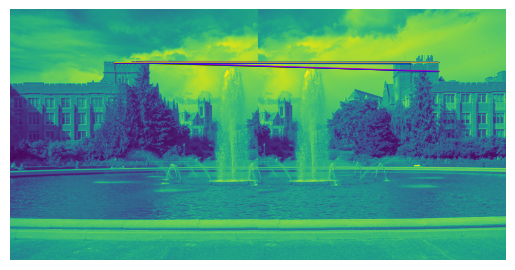

In [102]:
orb_full_flow("fontanna1.jpg", "fontanna2.jpg", 3)


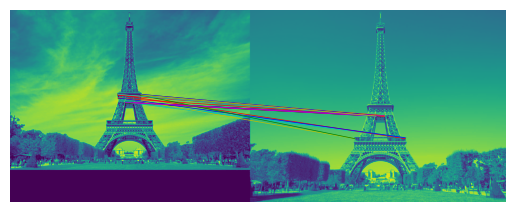

In [103]:
orb_full_flow("eiffel1.jpg", "eiffel2.jpg", 3)

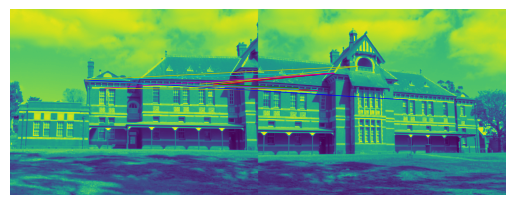

In [104]:
orb_full_flow("budynek1.jpg", "budynek2.jpg", 3)

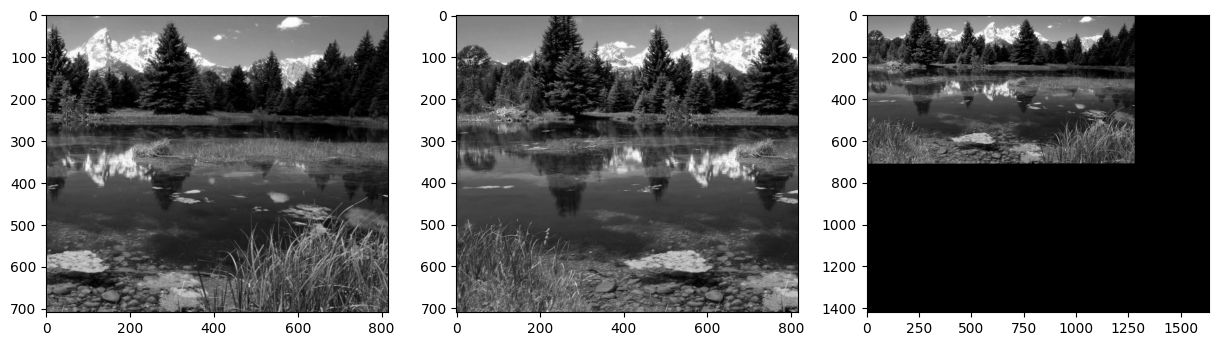

In [2]:
image_1 = cv2.imread('left_panorama.jpg', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('right_panorama.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints_1, descriptions_1 = sift.detectAndCompute(image_1, None)
keypoints_2, descriptions_2 = sift.detectAndCompute(image_2, None)

matcher = cv2.BFMatcher(cv2.NORM_L2)

res_matches = matcher.knnMatch(descriptions_1, descriptions_2, k=2)


best_matches = []
for m, n in res_matches:
    if m.distance < 0.5 * n.distance:
        best_matches.append(m)

keypoints_1 = np.float32([kp.pt for kp in keypoints_1])
keypoints_2 = np.float32([kp.pt for kp in keypoints_2])

src_pts = np.float32([keypoints_1[m.queryIdx] for m in best_matches])
dst_pts = np.float32([keypoints_2[m.trainIdx] for m in best_matches])

homography_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

result = cv2.warpPerspective(image_1, homography_matrix, (image_2.shape[1] + image_1.shape[1], image_2.shape[0]+image_1.shape[0]))

result[0:image_2.shape[0], 0:image_2.shape[1]] = image_2

plot(image_1, image_2, result)